# Pedestrian classification
Erik Matovič and Jakub Horvat

[Dataset](https://data.nvision2.eecs.yorku.ca/PIE_dataset/)

### 0. Imports

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from os import listdir
from os.path import join
from pie_data import PIE
import cv2
from math import floor, ceil

In [4]:
pie_path = '../../zadanie2/' #'/media/erik/T7/DP/PIE_data' # '../' 
pie = PIE(data_path=pie_path)
type(pie)

pie_data.PIE

In [5]:
train_list = pie._get_image_set_ids('train')
test_list = pie._get_image_set_ids('test')
val_list = pie._get_image_set_ids('val')

train_list, val_list, test_list

(['set01', 'set02', 'set04'], ['set05', 'set06'], ['set03'])

In [6]:
class PIE_peds():
    def __init__(self, setname: str, pie: PIE) -> None:
        #super().__init__()
        self.setname = setname
        self.set_dir = dict()
        self.all_path = list()
        self.all_filenames = list()
        self.path = pie._images_path

        assert setname in ['train', 'val', 'test']
        
        self.img_init(pie)
        
    
    def __len__(self):
        return len(self.all_filenames)
    
    def img_init(self, pie) -> None:
        set_list = pie._get_image_set_ids(self.setname)

        for set_ in set_list:
            set_path = join(pie._images_path, set_)
            self.set_dir[set_] = dict()
            
            set_content = listdir(set_path)
            for video in set_content:
                video_path = join(set_path, video)
                imgs = listdir(video_path)
                self.all_path += ([video_path] * len(imgs))
                self.all_filenames += imgs
                self.set_dir[set_][video] = imgs
        print(self.set_dir)    


In [7]:
train_dataset = PIE_peds('train', pie)
val_dataset = PIE_peds('val', pie)
test_dataset = PIE_peds('test', pie)

print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))

{'set01': {'video_0004': ['00002.png', '00005.png', '00001.png', '00000.png', '00013.png', '00003.png', '00006.png', '00007.png', '00008.png', '00015.png', '00010.png', '00004.png', '00011.png', '00014.png', '00009.png', '00012.png'], 'video_0001': ['01127.png', '01130.png', '01134.png', '01129.png', '01139.png', '01137.png', '01132.png', '01128.png', '01131.png', '01133.png', '01140.png', '01138.png', '01125.png', '01135.png', '01136.png', '01126.png'], 'video_0003': ['00127.png', '00128.png', '00121.png', '00134.png', '00131.png', '00123.png', '00135.png', '00129.png', '00130.png', '00132.png', '00124.png', '00126.png', '00122.png', '00125.png', '00133.png', '00120.png'], 'video_0002': ['04698.png', '04697.png', '04702.png', '04704.png', '04709.png', '04707.png', '04705.png', '04710.png', '04695.png', '04699.png', '04696.png', '04703.png', '04701.png', '04706.png', '04700.png', '04708.png']}, 'set02': {'video_0001': ['02830.png', '02836.png', '02838.png', '02825.png', '02823.png', '0

In [73]:
def save_img_annotations(dataset: PIE_peds, folder: str):# -> None:
    """
    Save images into given folder and also CSV annotations. 

    :param dataset: PIE_peds class, where all paths are set. 
    :param folder: folder train or val or test to save pedestrians.
    """

    assert folder in ['train', 'val', 'test']

    img_width = 1920
    img_height = 1080

    target = dict()
    target['set'] = []
    target['video'] = []
    target['frame'] = []
    target['Category'] = []
    target['x1'] = []
    target['y1'] = []
    target['width'] = []
    target['height'] = []

    target_v = dict()
    target_v['set'] = []
    target_v['video'] = []
    target_v['frame'] = []
    target_v['Category'] = []
    target_v['x1'] = []
    target_v['y1'] = []
    target_v['width'] = []
    target_v['height'] = []

    target_l = dict()
    target_l['set'] = []
    target_l['video'] = []
    target_l['frame'] = []
    target_l['Category'] = []
    target_l['x1'] = []
    target_l['y1'] = []
    target_l['width'] = []
    target_l['height'] = []

    target_s = dict()
    target_s['set'] = []
    target_s['video'] = []
    target_s['frame'] = []
    target_s['Category'] = []
    target_s['x1'] = []
    target_s['y1'] = []
    target_s['width'] = []
    target_s['height'] = []
    
    category = dict()
    category['p'] = 0   # pedestrian
    category['v'] = 1   # vehicle
    category['l'] = 2   # traffic light
    category['s'] = 3   # sign
    #img_counter = 0
    for set_name in dataset.set_dir:
        for video in dataset.set_dir[set_name]:
            annotations = pie._get_annotations(set_name, video)
            #annotations_attributes = pie._get_ped_attributes(set_name, video)
            for frame in dataset.set_dir[set_name][video]: 
                #img_path = '../images/' + set_name + '/' + video + '/' + frame
                #img_path = '/media/erik/T7/DP/PIE_data/images/' + set_name + '/' + video + '/' + frame
                #print(img_path, type(img_path))

                #img = cv2.imread(img_path)
                # plt.imshow(img)
                for idx in annotations['traffic_annotations']: #['ped_annotations']:
                    frame_idx = int(frame[:-4])
                    #print(idx)
                    if frame_idx in annotations['traffic_annotations'][idx]['frames']:
                        #if idx in target['ped']:
                        #    break

                        frame_key = annotations['traffic_annotations'][idx]['frames'].index(frame_idx)
                        
                        bbox = annotations['traffic_annotations'][idx]['bbox'][frame_key] 
                        
                        # BBox for pedestrian
                        x1 = bbox[0]
                        y1 = bbox[1]
                        x2 = bbox[2]
                        y2 = bbox[3]
                        width = x2 - x1
                        height = y2 - y1

                        target['set'].append(set_name)
                        target['video'].append(video)
                        target['frame'].append(frame[:-4])
                        target['Category'].append(category['p'])
                        target['x1'].append(x1 / img_width)
                        target['y1'].append(y1 / img_height)
                        target['width'].append(width / img_width)
                        target['height'].append(height / img_height)
                        #print(idx + 'tl')
                        #print(annotations['traffic_annotations'])

                        #print(target)
                        #print(width / img_width, height / img_height)
                        #print(x1 / img_width, y1 / img_height)
                        #return 
                        #crop_img = img[y1:y2, x1:x2]
                        #crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
                        #crop_img = cv2.resize(crop_img, (64, 64))
                        
                        #f_name = '../images/' + folder + '/' + set_name + '_' + video + '_' + target['ped'][-1] + '_' + frame
                        #f_name = '/media/erik/T7/DP/PIE_data/images/' + folder + '/' + set_name + '_' + video + '_' + target['ped'][-1] + '_' + frame
                        
                        # print(f_name)
                        #cv2.imwrite(f_name, img)

                        #cv2.imshow("cropped", crop_img)
                        #cv2.waitKey(0)
                        #cv2.destroyAllWindows()
                        #print(type(target['BBox'][-1][1]))
                        #break
                for idx in annotations['traffic_annotations']:
                    frame_idx = int(frame[:-4])
                    #print(frame[:-4]) #idx)
                    #return
                    if frame_idx in annotations['traffic_annotations'][idx]['frames']: #['ped_annotations'][idx]['frames']:
                        #if idx in target['ped']:
                        #    break

                        frame_key = annotations['traffic_annotations'][idx]['frames'].index(frame_idx)#['ped_annotations'][idx]['frames'].index(frame_idx)
                        
                        bbox = annotations['traffic_annotations'][idx]['bbox'][frame_key] 
                        #bbox = annotations['ped_annotations'][idx]['bbox'][frame_key] 
                        #print(bbox)
                        # BBox for pedestrian
                        x1 = bbox[0]
                        y1 = bbox[1]
                        x2 = bbox[2]
                        y2 = bbox[3]
                        width = x2 - x1
                        height = y2 - y1

                        if idx[-1:] == 'v':
                            target_v['set'].append(set_name)
                            target_v['video'].append(video)
                            target_v['frame'].append(frame[:-4])
                            target_v['Category'].append(category['v'])
                            target_v['x1'].append(x1 / img_width)
                            target_v['y1'].append(y1 / img_height)
                            target_v['width'].append(width / img_width)
                            target_v['height'].append(height / img_height)
                        
                        elif idx[-1:] == 'l':
                            target_l['set'].append(set_name)
                            target_l['video'].append(video)
                            target_l['frame'].append(frame[:-4])
                            target_l['Category'].append(category['l'])
                            target_l['x1'].append(x1 / img_width)
                            target_l['y1'].append(y1 / img_height)
                            target_l['width'].append(width / img_width)
                            target_l['height'].append(height / img_height)

                        elif idx[-1:] == 's':
                            target_s['set'].append(set_name)
                            target_s['video'].append(video)
                            target_s['frame'].append(frame[:-4])
                            target_s['Category'].append(category['s'])
                            target_s['x1'].append(x1 / img_width)
                            target_s['y1'].append(y1 / img_height)
                            target_s['width'].append(width / img_width)
                            target_s['height'].append(height / img_height)
    #df = pd.DataFrame(data=target)
    #annotations_path = '../' + folder + '_annotations.csv'
    #df.to_csv(annotations_path)
    #print(f'{folder} done!')
    #print('target', target)
    #print('target_v', target_v)
    #print('target_l', target_l)
    #print('target_s', target_s)
    return target, target_v, target_l, target_s


target, target_v, target_l, target_s = save_img_annotations(train_dataset, 'train')
#save_img_annotations(val_dataset, 'val')
#save_img_annotations(test_dataset, 'test')

../../zadanie2/annotations/set01/video_0004_annt.xml
../../zadanie2/annotations/set01/video_0001_annt.xml
../../zadanie2/annotations/set01/video_0003_annt.xml
../../zadanie2/annotations/set01/video_0002_annt.xml
../../zadanie2/annotations/set02/video_0001_annt.xml
../../zadanie2/annotations/set02/video_0003_annt.xml
../../zadanie2/annotations/set02/video_0002_annt.xml
../../zadanie2/annotations/set04/video_0005_annt.xml
../../zadanie2/annotations/set04/video_0012_annt.xml
../../zadanie2/annotations/set04/video_0011_annt.xml
../../zadanie2/annotations/set04/video_0009_annt.xml
../../zadanie2/annotations/set04/video_0015_annt.xml
../../zadanie2/annotations/set04/video_0016_annt.xml
../../zadanie2/annotations/set04/video_0014_annt.xml
../../zadanie2/annotations/set04/video_0004_annt.xml
../../zadanie2/annotations/set04/video_0001_annt.xml
../../zadanie2/annotations/set04/video_0008_annt.xml
../../zadanie2/annotations/set04/video_0006_annt.xml
../../zadanie2/annotations/set04/video_0003_an

In [74]:
target = pd.DataFrame(target)
target_v = pd.DataFrame(target_v)
target_l = pd.DataFrame(target_l)
target_s = pd.DataFrame(target_s)

In [75]:
result = pd.concat([target, target_v, target_l, target_s])
result

,set,video,frame,Category,x1,y1,width,height
0,set01,video_0004,00002,0,0.518094,0.740667,0.027625,0.041407
1,set01,video_0004,00002,0,0.564089,0.700815,0.007042,0.013880
2,set01,video_0004,00005,0,0.518969,0.740704,0.027729,0.041741
3,set01,video_0004,00005,0,0.565547,0.700074,0.007042,0.013880
4,set01,video_0004,00001,0,0.517797,0.740657,0.027599,0.041287
...,...,...,...,...,...,...,...,...
75,set04,video_0013,01743,3,0.594240,0.571167,0.009219,0.084370
76,set04,video_0013,01748,3,0.665979,0.444306,0.169896,0.421019
77,set04,video_0013,01748,3,0.606297,0.568574,0.009745,0.087389
78,set04,video_0013,01737,3,0.635797,0.463444,0.153672,0.381111


In [107]:
folder = 'train'

map_ = dict()
map_['img'] = []
map_['annotation'] = []

for index, row in result.iterrows():
    set_ = row['set']           
    video = row['video']
    frame = row['frame']
    img_path = '../../zadanie2/images/' + str(set_) + '/' + video + '/' + frame + '.png'
    #print(img_path)
    img = cv2.imread(img_path)
    #img_resize = cv2.resize(img, (600, 400))
    #cv2.imshow("img", img_resize)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    #print(set, video, frame, '\n', row)
    f_name = '../data/' + folder + '/' + str(index) + '.png'
    #print(f_name)
    #f_name = '/media/erik/T7/DP/PIE_data/images/' + folder + '/' + set_name + '_' + video + '_' + target['ped'][-1] + '_' + frame
    
    cv2.imwrite(f_name, img)
    map_['img'].append(str(index) + '.png')
    
    df = result.loc[(result['set'] == set_) & 
                    (result['video'] == video) &
                    (result['frame'] == frame)].iloc[:, -5:]
    
    annotations_path = '../label/' + folder + '/' + str(index) + '.csv'
    df.to_csv(annotations_path, index=False, header=False)
    print(f_name, annotations_path)

    map_['annotation'].append(str(index) + '.csv')
    #print(df)
    break

path = '../' + folder + '.csv'
df = pd.DataFrame(map_)
df.to_csv(path, index=False, header=False)

../data/train/0.png ../label/train/0.csv


In [ ]:
def make_dataset(dataset: PIE_peds, folder: str):# -> None:
    """
    Save images into given folder and also CSV annotations. 

    :param dataset: PIE_peds class, where all paths are set. 
    :param folder: folder train or val or test to save pedestrians.
    """

    assert folder in ['train', 'val', 'test']

    img_counter = 0
    for set_name in dataset.set_dir:
        for video in dataset.set_dir[set_name]:
            annotations = pie._get_annotations(set_name, video)
            #annotations_attributes = pie._get_ped_attributes(set_name, video)
            for frame in dataset.set_dir[set_name][video]: 
                img_path = '../images/' + set_name + '/' + video + '/' + frame
                #img_path = '/media/erik/T7/DP/PIE_data/images/' + set_name + '/' + video + '/' + frame
                #print(img_path, type(img_path))

                img = cv2.imread(img_path)
                # plt.imshow(img)
                for idx in annotations['traffic_annotations']: #['ped_annotations']:
                    frame_idx = int(frame[:-4])
                    #print(idx)
                    if frame_idx in annotations['traffic_annotations'][idx]['frames']:
                        #if idx in target['ped']:
                        #    break

                        frame_key = annotations['traffic_annotations'][idx]['frames'].index(frame_idx)
                        
                        bbox = annotations['traffic_annotations'][idx]['bbox'][frame_key] 
                        
                        # BBox for pedestrian
                        x1 = bbox[0]
                        y1 = bbox[1]
                        x2 = bbox[2]
                        y2 = bbox[3]
                        width = x2 - x1
                        height = y2 - y1

                        target['set'].append(set_name)
                        target['video'].append(video)
                        target['frame'].append(frame_idx)
                        target['Category'].append(category['p'])
                        target['x1'].append(x1 / img_width)
                        target['y1'].append(y1 / img_height)
                        target['width'].append(width / img_width)
                        target['height'].append(height / img_height)
                        #print(idx + 'tl')
                        #print(annotations['traffic_annotations'])

                        #print(target)
                        #print(width / img_width, height / img_height)
                        #print(x1 / img_width, y1 / img_height)
                        #return 
                        #crop_img = img[y1:y2, x1:x2]
                        #crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
                        #crop_img = cv2.resize(crop_img, (64, 64))
                        
                        f_name = '../images/' + folder + '/' + set_name + '_' + video + '_' + target['ped'][-1] + '_' + frame
                        #f_name = '/media/erik/T7/DP/PIE_data/images/' + folder + '/' + set_name + '_' + video + '_' + target['ped'][-1] + '_' + frame
                        
                        # print(f_name)
                        cv2.imwrite(f_name, img)

                        #cv2.imshow("cropped", crop_img)
                        #cv2.waitKey(0)
                        #cv2.destroyAllWindows()
                        #print(type(target['BBox'][-1][1]))
                        #break
                for idx in annotations['traffic_annotations']:
                    frame_idx = int(frame[:-4])
                    #print(idx)
                    if frame_idx in annotations['traffic_annotations'][idx]['frames']: #['ped_annotations'][idx]['frames']:
                        #if idx in target['ped']:
                        #    break

                        frame_key = annotations['traffic_annotations'][idx]['frames'].index(frame_idx)#['ped_annotations'][idx]['frames'].index(frame_idx)
                        
                        bbox = annotations['traffic_annotations'][idx]['bbox'][frame_key] 
                        #bbox = annotations['ped_annotations'][idx]['bbox'][frame_key] 
                        #print(bbox)
                        # BBox for pedestrian
                        x1 = bbox[0]
                        y1 = bbox[1]
                        x2 = bbox[2]
                        y2 = bbox[3]
                        width = x2 - x1
                        height = y2 - y1

                        if idx[-1:] == 'v':
                            target_v['set'].append(set_name)
                            target_v['video'].append(video)
                            target_v['frame'].append(frame_idx)
                            target_v['Category'].append(category['v'])
                            target_v['x1'].append(x1 / img_width)
                            target_v['y1'].append(y1 / img_height)
                            target_v['width'].append(width / img_width)
                            target_v['height'].append(height / img_height)
                        
                        elif idx[-1:] == 'l':
                            target_l['set'].append(set_name)
                            target_l['video'].append(video)
                            target_l['frame'].append(frame_idx)
                            target_l['Category'].append(category['l'])
                            target_l['x1'].append(x1 / img_width)
                            target_l['y1'].append(y1 / img_height)
                            target_l['width'].append(width / img_width)
                            target_l['height'].append(height / img_height)

                        elif idx[-1:] == 's':
                            target_s['set'].append(set_name)
                            target_s['video'].append(video)
                            target_s['frame'].append(frame_idx)
                            target_s['Category'].append(category['s'])
                            target_s['x1'].append(x1 / img_width)
                            target_s['y1'].append(y1 / img_height)
                            target_s['width'].append(width / img_width)
                            target_s['height'].append(height / img_height)
    #df = pd.DataFrame(data=target)
    #annotations_path = '../' + folder + '_annotations.csv'
    #df.to_csv(annotations_path)
    #print(f'{folder} done!')
    print('target', target)
    print('target_v', target_v)
    print('target_l', target_l)
    print('target_s', target_s)
    #return target


save_img_annotations(train_dataset, 'train')
#save_img_annotations(val_dataset, 'val')
#save_img_annotations(test_dataset, 'test')

In [143]:
df_train = pd.read_csv('../train_annotations.csv')
df_train

,Unnamed: 0.1,Unnamed: 0,set,video,frame,ped_idx,ped,BBox,action,age,gender,look,cross
0,0,0,set01,video_0001,01013.png,0,1_1_1,"[916.82, 793.32, 929.18, 847.11]",0,2,1,0,0
1,1,1,set01,video_0001,01013.png,0,1_1_2,"[917.42, 796.87, 929.7, 846.4]",0,2,0,0,0
2,2,2,set01,video_0001,01142.png,29,1_1_13,"[1230.37, 771.16, 1253.65, 852.48]",0,2,0,1,0
3,3,3,set01,video_0001,01324.png,0,1_1_3,"[1111.97, 805.05, 1122.51, 831.83]",0,2,1,0,0
4,4,4,set01,video_0001,01324.png,0,1_1_4,"[1119.19, 803.13, 1127.71, 835.05]",0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,698,698,set04,video_0016,11921.png,0,4_16_1722,"[1202.91, 721.57, 1225.95, 804.51]",0,2,0,0,0
699,699,699,set04,video_0016,12950.png,0,4_16_1728,"[730.54, 728.5, 740.9, 759.43]",1,2,1,0,0
700,700,700,set04,video_0016,12950.png,0,4_16_1729,"[716.84, 728.58, 725.76, 756.82]",0,2,1,0,0
701,701,701,set04,video_0016,12950.png,0,4_16_1730,"[715.38, 738.12, 723.0, 757.4]",0,0,1,0,0


In [138]:
df_train.gender.loc[df_train['gender'] == 2] = 0

<ipython-input-138-2f0d566db196>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.gender.loc[df_train['gender'] == 2] = 0


In [139]:
df_train.cross.loc[df_train['cross'] == -1] = 2

<ipython-input-139-2d7f461cfdc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.cross.loc[df_train['cross'] == -1] = 2


In [140]:
df_train.loc[df_train['cross'] == 2]

,Unnamed: 0,set,video,frame,ped_idx,ped,BBox,action,age,gender,look,cross
7,7,set01,video_0001,01564.png,0,1_1_7,"[1270.41, 799.4, 1293.25, 876.16]",1,2,0,0,2
9,9,set01,video_0001,10533.png,0,1_1_14,"[1282.64, 773.55, 1318.81, 881.51]",1,2,0,1,2
23,23,set01,video_0002,05322.png,0,1_2_24,"[6.1, 695.96, 24.43, 738.3]",1,2,0,0,2
46,46,set01,video_0002,14088.png,49,1_2_49,"[1566.85, 743.21, 1593.94, 809.18]",1,2,0,0,2
81,81,set01,video_0003,17751.png,194,1_3_98,"[1313.84, 721.86, 1377.72, 962.98]",1,2,0,0,2
82,82,set01,video_0003,17751.png,178,1_3_99,"[1369.6, 754.56, 1440.64, 953.94]",1,2,1,0,2
142,142,set02,video_0002,10746.png,157,2_2_160,"[456.07, 765.63, 529.0, 905.78]",1,3,1,0,2
195,195,set04,video_0001,07286.png,123,4_1_1016,"[1335.73, 711.03, 1362.06, 785.68]",1,2,0,0,2
206,206,set04,video_0001,13574.png,0,4_1_1032,"[891.16, 735.08, 910.55, 783.11]",1,2,1,0,2
399,399,set04,video_0007,06278.png,1803,4_7_1319,"[1775.54, 695.24, 1841.87, 872.64]",1,2,0,0,2


In [141]:
df_train

,Unnamed: 0,set,video,frame,ped_idx,ped,BBox,action,age,gender,look,cross
0,0,set01,video_0001,01013.png,0,1_1_1,"[916.82, 793.32, 929.18, 847.11]",0,2,1,0,0
1,1,set01,video_0001,01013.png,0,1_1_2,"[917.42, 796.87, 929.7, 846.4]",0,2,0,0,0
2,2,set01,video_0001,01142.png,29,1_1_13,"[1230.37, 771.16, 1253.65, 852.48]",0,2,0,1,0
3,3,set01,video_0001,01324.png,0,1_1_3,"[1111.97, 805.05, 1122.51, 831.83]",0,2,1,0,0
4,4,set01,video_0001,01324.png,0,1_1_4,"[1119.19, 803.13, 1127.71, 835.05]",0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
698,698,set04,video_0016,11921.png,0,4_16_1722,"[1202.91, 721.57, 1225.95, 804.51]",0,2,0,0,0
699,699,set04,video_0016,12950.png,0,4_16_1728,"[730.54, 728.5, 740.9, 759.43]",1,2,1,0,0
700,700,set04,video_0016,12950.png,0,4_16_1729,"[716.84, 728.58, 725.76, 756.82]",0,2,1,0,0
701,701,set04,video_0016,12950.png,0,4_16_1730,"[715.38, 738.12, 723.0, 757.4]",0,0,1,0,0


In [117]:
df_val = pd.read_csv('../val_annotations.csv')
df_val

,Unnamed: 0.1,Unnamed: 0,set,video,frame,ped_idx,ped,BBox,action,age,gender,look,cross
0,0,0,set05,video_0001,00532.png,0,5_1_1731,"[452.38, 693.43, 473.43, 760.54]",1,2,0,0,0
1,1,1,set05,video_0001,01674.png,0,5_1_1733,"[1083.12, 740.66, 1106.6, 804.7]",0,2,1,0,0
2,2,2,set05,video_0001,02250.png,0,5_1_1739,"[1218.29, 703.6, 1263.13, 810.43]",1,2,0,0,0
3,3,3,set05,video_0001,02917.png,0,5_1_1740,"[1257.07, 704.4, 1297.64, 812.99]",1,2,0,0,0
4,4,4,set05,video_0001,03622.png,381,5_1_1742,"[1311.37, 728.34, 1334.89, 790.24]",1,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,206,206,set06,video_0009,12668.png,0,6_9_1972,"[1107.57, 747.1, 1115.64, 777.56]",1,2,0,0,0
207,207,207,set06,video_0009,13019.png,0,6_9_1986,"[1030.8, 759.31, 1039.6, 783.61]",0,3,1,0,0
208,208,208,set06,video_0009,13037.png,0,6_9_1984,"[1122.82, 751.68, 1136.64, 794.53]",0,2,1,0,0
209,209,209,set06,video_0009,13447.png,0,6_9_1973,"[691.69, 744.51, 716.07, 792.79]",0,2,0,0,0


In [22]:
df_val.loc[df_val['gender'] == 2]

,Unnamed: 0,set,video,frame,ped_idx,ped,BBox,action,age,gender,look,cross
0,0,set05,video_0001,00532.png,0,5_1_1731,"[452.38, 693.43, 473.43, 760.54]",1,2,2,0,0
2,2,set05,video_0001,02250.png,0,5_1_1739,"[1218.29, 703.6, 1263.13, 810.43]",1,2,2,0,0
3,3,set05,video_0001,02917.png,0,5_1_1740,"[1257.07, 704.4, 1297.64, 812.99]",1,2,2,0,0
6,6,set05,video_0001,10116.png,0,5_1_1744,"[1533.17, 698.17, 1552.5, 748.6]",1,2,2,0,0
7,7,set05,video_0001,15573.png,0,5_1_1749,"[1014.93, 727.87, 1025.34, 759.32]",1,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,set06,video_0009,08319.png,0,6_9_1962,"[736.12, 745.85, 745.33, 773.5]",0,2,2,0,0
201,201,set06,video_0009,09351.png,0,6_9_1970,"[717.33, 746.74, 729.7, 779.5]",0,2,2,0,0
202,202,set06,video_0009,10531.png,0,6_9_1983,"[378.35, 713.61, 391.0, 752.59]",1,2,2,0,0
206,206,set06,video_0009,12668.png,0,6_9_1972,"[1107.57, 747.1, 1115.64, 777.56]",1,2,2,0,0


In [25]:
df_val.loc[df_val['cross'] == -1]

,Unnamed: 0,set,video,frame,ped_idx,ped,BBox,action,age,gender,look,cross


In [72]:
df_train.loc[df_train['cross'] == -1]

,Unnamed: 0,set,video,frame,ped_idx,ped,BBox,action,age,gender,look,cross


In [26]:
df_val.gender.loc[df_val['gender'] == 2] = 0

<ipython-input-26-195c3f5f0066>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.gender.loc[df_val['gender'] == 2] = 0


In [27]:
df_val.gender.loc[df_val['gender'] == 0]

0      0
2      0
3      0
6      0
7      0
      ..
196    0
201    0
202    0
206    0
209    0
Name: gender, Length: 118, dtype: int64

In [28]:
df_test = pd.read_csv('../test_annotations.csv')
df_test

,Unnamed: 0,set,video,frame,ped_idx,ped,BBox,action,age,gender,look,cross
0,0,set03,video_0001,01464.png,0,3_1_220,"[1120.8, 728.6, 1128.72, 756.1]",1,2,1,0,0
1,1,set03,video_0001,01660.png,0,3_1_221,"[849.79, 754.25, 855.65, 774.81]",0,2,2,0,0
2,2,set03,video_0001,01865.png,107,3_1_222,"[0.0, 660.72, 37.2, 856.8]",0,2,2,0,0
3,3,set03,video_0001,01935.png,0,3_1_223,"[874.75, 749.17, 880.55, 768.27]",0,3,2,0,0
4,4,set03,video_0001,02433.png,0,3_1_229,"[989.84, 741.66, 995.72, 757.1]",0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
574,574,set03,video_0019,09357.png,0,3_19_997,"[998.75, 748.82, 1015.17, 797.59]",0,2,1,0,0
575,575,set03,video_0019,09526.png,0,3_19_998,"[1133.12, 699.77, 1177.91, 845.25]",0,2,1,0,0
576,576,set03,video_0019,09685.png,27,3_19_999,"[93.4, 727.01, 122.91, 823.79]",0,2,2,0,0
577,577,set03,video_0019,10820.png,0,3_19_1000,"[1035.5, 745.39, 1043.47, 770.63]",1,2,1,0,0


In [37]:
df_test.cross.loc[df_test['cross'] == -1] = 2

<ipython-input-37-7386280484d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.cross.loc[df_test['cross'] == -1] = 2


In [38]:
df_test.loc[df_test['cross'] == -1]

,Unnamed: 0,set,video,frame,ped_idx,ped,BBox,action,age,gender,look,cross


In [35]:
df_test.gender.loc[df_test['gender'] == 2] = 0

<ipython-input-35-295639ebb239>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.gender.loc[df_test['gender'] == 2] = 0


In [36]:
df_test.loc[df_test['gender'] == 2]

,Unnamed: 0,set,video,frame,ped_idx,ped,BBox,action,age,gender,look,cross


## Data rotation

In [35]:
def plot(rotated_imgs, col_title):
    plt.figure()
    f, axarr = plt.subplots(1, len(rotated_imgs))
    f.set_size_inches(18.5, 10.5)
    f.set_dpi(100)

    for i in range(len(rotated_imgs)):
        axarr[i].imshow(rotated_imgs[i], cmap='gray')
        axarr[i].set_title(col_title[i])
        axarr[i].axis('off')

    plt.show()


def plot_1(rotated_imgs, col_title):
    plt.figure()
    f, axarr = plt.subplots(1, len(rotated_imgs))
    f.set_size_inches(18.5, 10.5)
    f.set_dpi(100)

    for i in range(len(rotated_imgs)):
        axarr.imshow(rotated_imgs[i], cmap='gray')
        axarr.set_title(col_title[i])
        axarr.axis('off')

    plt.show()

<Figure size 432x288 with 0 Axes>

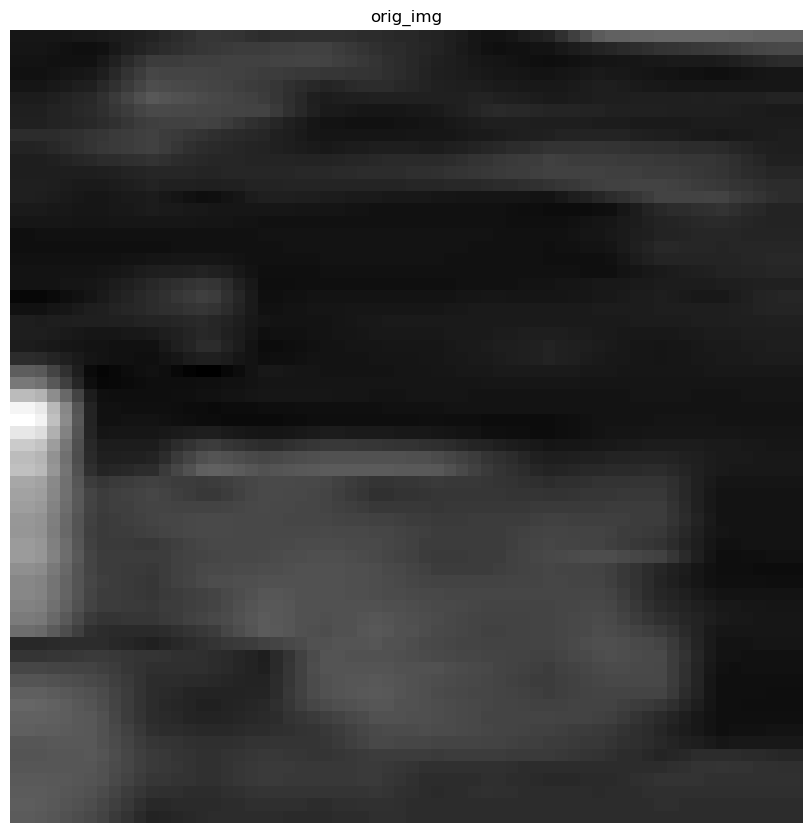

<Figure size 432x288 with 0 Axes>

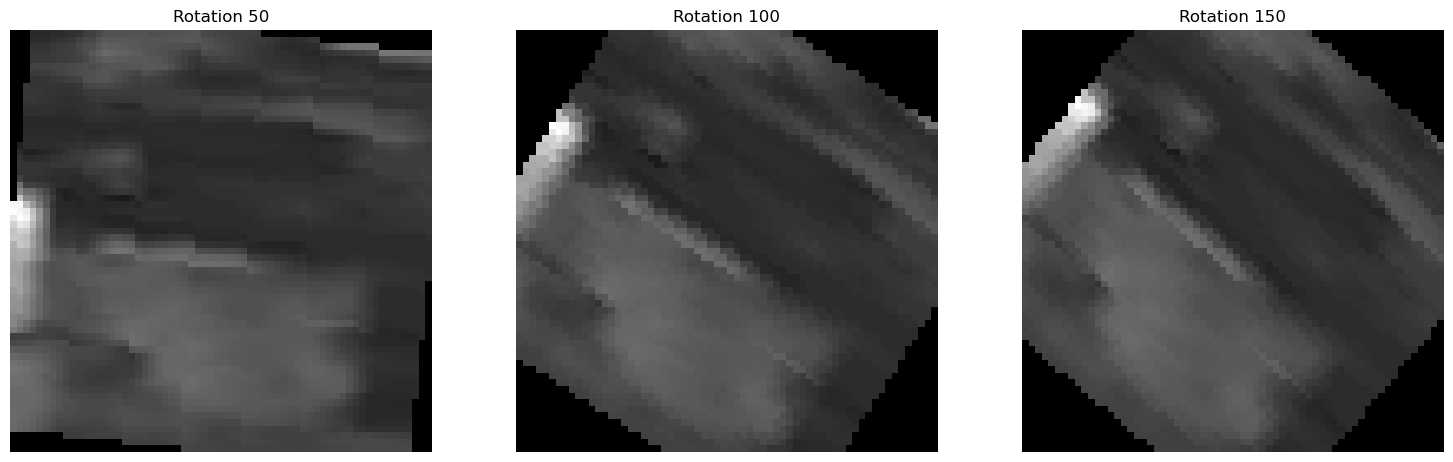

In [4]:
from torchvision import transforms
from PIL import Image
from pathlib import Path

orig_img = Image.open(Path('../images/train/set01_video_0001_1_1_1_01013.png'))
plot_1([orig_img], ['orig_img'])
rotated_imgs = [transforms.RandomRotation(degrees=d)(orig_img) for d in range(50,151,50)]
plot(rotated_imgs, col_title=["Rotation 50","Rotation 100","Rotation 150"])

<Figure size 432x288 with 0 Axes>

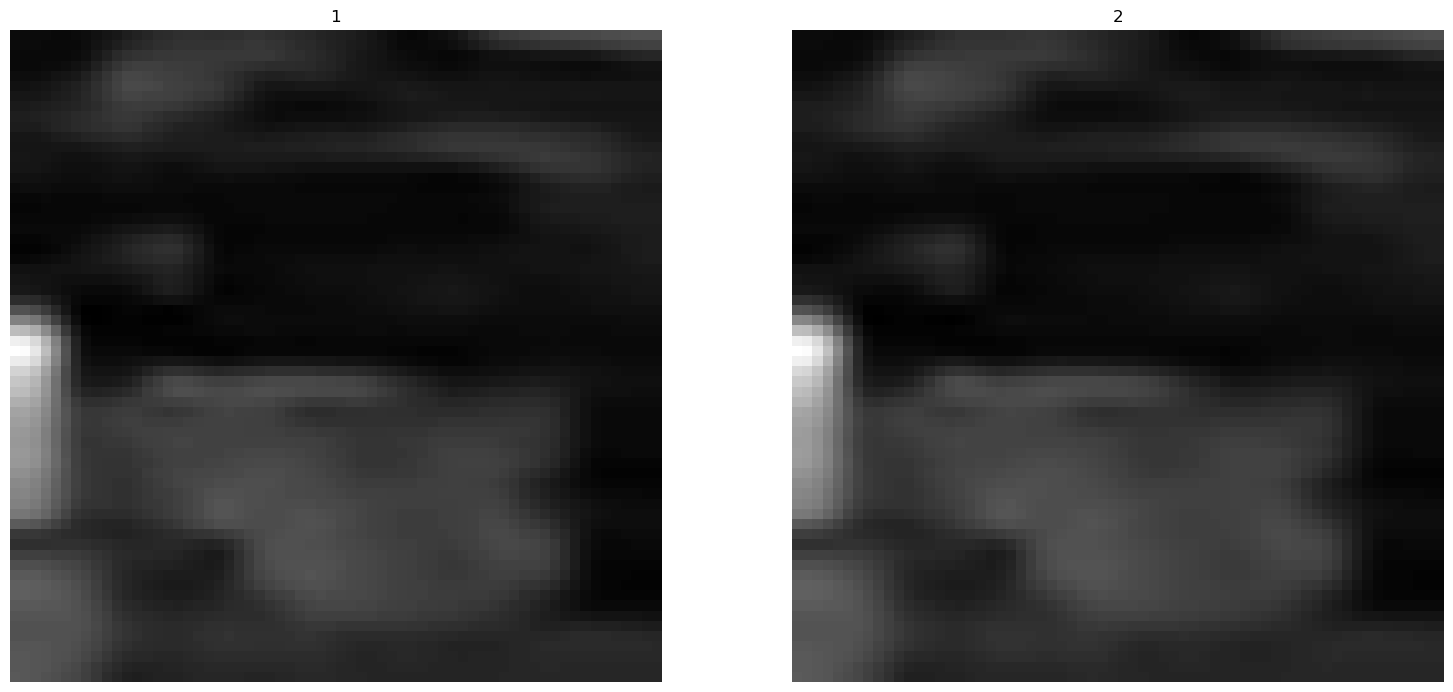

In [5]:
blurred_imgs = [transforms.GaussianBlur(kernel_size=(3, 3), sigma=sigma)(orig_img) for sigma in (1,5)]
plot(blurred_imgs, col_title=["1", "2", "3"])

In [144]:
df_cross = df_train.loc[df_train.cross == 1]
df_look = df_train.loc[df_train.look == 1]
df_cross

,Unnamed: 0.1,Unnamed: 0,set,video,frame,ped_idx,ped,BBox,action,age,gender,look,cross
39,39,39,set01,video_0002,12533.png,1891,1_2_44,"[184.73, 702.47, 300.78, 965.28]",1,2,1,0,1
40,40,40,set01,video_0002,12533.png,1866,1_2_45,"[191.6, 703.18, 285.54, 941.54]",1,2,1,0,1
41,41,41,set01,video_0002,12533.png,1792,1_2_39,"[268.01, 739.38, 320.6, 913.0]",1,2,1,0,1
42,42,42,set01,video_0002,12533.png,1744,1_2_40,"[246.96, 720.25, 310.34, 925.28]",1,2,0,0,1
43,43,43,set01,video_0002,12533.png,1261,1_2_41,"[137.16, 700.48, 214.57, 916.58]",1,2,0,0,1
48,48,48,set01,video_0002,15944.png,155,1_2_51,"[584.43, 733.69, 730.3, 1075.3]",1,2,0,0,1
49,49,49,set01,video_0002,16147.png,118,1_2_52,"[790.49, 701.53, 995.54, 1080.0]",1,2,0,0,1
83,83,83,set01,video_0003,17751.png,174,1_3_97,"[1692.01, 613.34, 1854.23, 1080.0]",1,2,0,0,1
96,96,96,set02,video_0001,07430.png,645,2_1_119,"[45.36, 705.17, 101.3, 878.9]",1,2,1,0,1
97,97,97,set02,video_0001,07430.png,274,2_1_118,"[88.81, 688.28, 177.18, 946.08]",1,2,1,1,1


In [145]:
10 * df_cross.action.value_counts()

1    590
Name: action, dtype: int64

In [8]:
10 * df_cross.age.value_counts()

2    500
3     90
Name: age, dtype: int64

In [9]:
10 * df_cross.gender.value_counts()

1    370
0    220
Name: gender, dtype: int64

In [10]:
10 * df_cross.look.value_counts()

0    570
1     20
Name: look, dtype: int64

In [118]:
df_cross = df_val.loc[df_val.cross == 1]
#df_look = df_train.loc[df_train.look == 1]
df_cross

,Unnamed: 0.1,Unnamed: 0,set,video,frame,ped_idx,ped,BBox,action,age,gender,look,cross
15,15,15,set06,video_0001,14078.png,695,6_1_1754,"[883.92, 738.77, 957.7, 911.42]",1,2,1,0,1
24,24,24,set06,video_0002,00540.png,443,6_2_1806,"[368.9, 698.09, 430.72, 842.36]",1,2,0,0,1
34,34,34,set06,video_0002,07095.png,262,6_2_1773,"[863.65, 723.39, 920.57, 856.33]",1,3,0,0,1
38,38,38,set06,video_0002,08334.png,136,6_2_1779,"[1269.89, 726.71, 1318.62, 845.72]",1,2,0,0,1
39,39,39,set06,video_0002,08334.png,132,6_2_1780,"[1323.0, 700.37, 1364.6, 838.65]",1,2,0,0,1
40,40,40,set06,video_0002,08334.png,129,6_2_1781,"[1405.21, 725.74, 1442.4, 839.67]",1,2,1,1,1
52,52,52,set06,video_0002,13790.png,482,6_2_1791,"[0.0, 611.82, 61.46, 895.57]",1,2,1,0,1
64,64,64,set06,video_0003,03636.png,144,6_3_1813,"[555.42, 648.02, 708.08, 971.18]",1,2,0,0,1
87,87,87,set06,video_0004,08491.png,525,6_4_1843,"[979.44, 747.75, 1011.42, 837.84]",1,3,1,0,1
152,152,152,set06,video_0007,16382.png,238,6_7_1912,"[910.63, 671.71, 1114.58, 1050.58]",1,2,1,0,1


In [147]:
imgs_names = df_cross['set'].values + '_' + df_cross['video'].values + '_' + df_cross['ped'].values + '_' + df_cross['frame'].values 	
imgs_names

array(['set01_video_0002_1_2_44_12533.png',
       'set01_video_0002_1_2_45_12533.png',
       'set01_video_0002_1_2_39_12533.png',
       'set01_video_0002_1_2_40_12533.png',
       'set01_video_0002_1_2_41_12533.png',
       'set01_video_0002_1_2_51_15944.png',
       'set01_video_0002_1_2_52_16147.png',
       'set01_video_0003_1_3_97_17751.png',
       'set02_video_0001_2_1_119_07430.png',
       'set02_video_0001_2_1_118_07430.png',
       'set02_video_0001_2_1_130_15770.png',
       'set02_video_0001_2_1_131_15770.png',
       'set02_video_0001_2_1_132_15770.png',
       'set02_video_0002_2_2_182_03198.png',
       'set02_video_0002_2_2_183_03198.png',
       'set02_video_0002_2_2_189_03198.png',
       'set02_video_0002_2_2_187_03198.png',
       'set02_video_0002_2_2_188_03198.png',
       'set02_video_0002_2_2_193_04589.png',
       'set02_video_0002_2_2_177_16722.png',
       'set02_video_0002_2_2_178_16722.png',
       'set02_video_0003_2_3_195_01178.png',
       'set02_vide

In [38]:
import torch

torch.manual_seed(10)


In [15]:
int((torch.rand(1) * 360) % 360)

112

In [132]:
df_val = pd.read_csv('../val_annotations.csv')
df_val

,Unnamed: 0.1,Unnamed: 0,set,video,frame,ped_idx,ped,BBox,action,age,gender,look,cross
0,0,0,set05,video_0001,00532.png,0,5_1_1731,"[452.38, 693.43, 473.43, 760.54]",1,2,0,0,0
1,1,1,set05,video_0001,01674.png,0,5_1_1733,"[1083.12, 740.66, 1106.6, 804.7]",0,2,1,0,0
2,2,2,set05,video_0001,02250.png,0,5_1_1739,"[1218.29, 703.6, 1263.13, 810.43]",1,2,0,0,0
3,3,3,set05,video_0001,02917.png,0,5_1_1740,"[1257.07, 704.4, 1297.64, 812.99]",1,2,0,0,0
4,4,4,set05,video_0001,03622.png,381,5_1_1742,"[1311.37, 728.34, 1334.89, 790.24]",1,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,206,206,set06,video_0009,12668.png,0,6_9_1972,"[1107.57, 747.1, 1115.64, 777.56]",1,2,0,0,0
207,207,207,set06,video_0009,13019.png,0,6_9_1986,"[1030.8, 759.31, 1039.6, 783.61]",0,3,1,0,0
208,208,208,set06,video_0009,13037.png,0,6_9_1984,"[1122.82, 751.68, 1136.64, 794.53]",0,2,1,0,0
209,209,209,set06,video_0009,13447.png,0,6_9_1973,"[691.69, 744.51, 716.07, 792.79]",0,2,0,0,0


In [154]:
df = pd.DataFrame()
df

root_path = '../images/train/'
for file in imgs_names:
    img_path = root_path + file
    img = Image.open(Path(img_path))

    #print(img_path)
    set_idx_start = 16
    ped_index_start = 38

    # pedestrian index is varying from index 38 to 41
    ped_index = img_path.index('_', ped_index_start)

    set_name = img_path[set_idx_start:set_idx_start+5]
    video_name = img_path[set_idx_start+6:set_idx_start+16]
    ped_name = img_path[set_idx_start+17:ped_index]
    frame_name = img_path[ped_index + 1:ped_index + 10]

    #print(set_name, video_name, ped_name, frame_name)
    #plot_1([img], col_title=["original"])
    for i in range(10):
        degree = int((torch.rand(1) * 360) % 360)
        #print(degree)
        rotated_img = transforms.RandomRotation(degrees=degree)(img)
        # save a image using extension
        fname = img_path + f'_rotated_{i}.png'
        #print(fname)
        #imgs_names = df_cross['set'].values + '_' + df_cross['video'].values + '_' + df_cross['ped'].values + '_' + df_cross['frame'].values 	
        #imgs_names = df_val['set'].values + '_' + df_val['video'].values + '_' + df_val['ped'].values + '_' + df_val['frame'].values 	

        label = df_cross.loc[
            (df_cross.set == set_name) &
            (df_cross.video == video_name) &
            (df_cross.frame == frame_name) &
            (df_cross.ped == ped_name), :
        ]
        #print(label)
        df2 = label.loc[label.frame == frame_name, :]
        df2['frame'] = frame_name + f'_rotated_{i}.png'
        df = pd.concat([df, df2])
        #df = df.append(label)
        rotated_img = rotated_img.save(fname)
        #plot_1([rotated_img], col_title=[f"Rotation {degree}"])

#df_val = pd.concat([df_val, df])

In [152]:
df

,Unnamed: 0.1,Unnamed: 0,set,video,frame,ped_idx,ped,BBox,action,age,gender,look,cross
39,39,39,set01,video_0002,12533.png_rotated_0.png,1891,1_2_44,"[184.73, 702.47, 300.78, 965.28]",1,2,1,0,1
39,39,39,set01,video_0002,12533.png_rotated_1.png,1891,1_2_44,"[184.73, 702.47, 300.78, 965.28]",1,2,1,0,1
39,39,39,set01,video_0002,12533.png_rotated_2.png,1891,1_2_44,"[184.73, 702.47, 300.78, 965.28]",1,2,1,0,1
39,39,39,set01,video_0002,12533.png_rotated_3.png,1891,1_2_44,"[184.73, 702.47, 300.78, 965.28]",1,2,1,0,1
39,39,39,set01,video_0002,12533.png_rotated_4.png,1891,1_2_44,"[184.73, 702.47, 300.78, 965.28]",1,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,663,663,set04,video_0015,03844.png_rotated_5.png,275,4_15_1681,"[411.6, 639.07, 541.1, 1036.04]",1,2,1,0,1
663,663,663,set04,video_0015,03844.png_rotated_6.png,275,4_15_1681,"[411.6, 639.07, 541.1, 1036.04]",1,2,1,0,1
663,663,663,set04,video_0015,03844.png_rotated_7.png,275,4_15_1681,"[411.6, 639.07, 541.1, 1036.04]",1,2,1,0,1
663,663,663,set04,video_0015,03844.png_rotated_8.png,275,4_15_1681,"[411.6, 639.07, 541.1, 1036.04]",1,2,1,0,1


In [155]:
df_train = pd.concat([df_train, df])
df_train

,Unnamed: 0.1,Unnamed: 0,set,video,frame,ped_idx,ped,BBox,action,age,gender,look,cross
0,0,0,set01,video_0001,01013.png,0,1_1_1,"[916.82, 793.32, 929.18, 847.11]",0,2,1,0,0
1,1,1,set01,video_0001,01013.png,0,1_1_2,"[917.42, 796.87, 929.7, 846.4]",0,2,0,0,0
2,2,2,set01,video_0001,01142.png,29,1_1_13,"[1230.37, 771.16, 1253.65, 852.48]",0,2,0,1,0
3,3,3,set01,video_0001,01324.png,0,1_1_3,"[1111.97, 805.05, 1122.51, 831.83]",0,2,1,0,0
4,4,4,set01,video_0001,01324.png,0,1_1_4,"[1119.19, 803.13, 1127.71, 835.05]",0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,663,663,set04,video_0015,03844.png_rotated_5.png,275,4_15_1681,"[411.6, 639.07, 541.1, 1036.04]",1,2,1,0,1
663,663,663,set04,video_0015,03844.png_rotated_6.png,275,4_15_1681,"[411.6, 639.07, 541.1, 1036.04]",1,2,1,0,1
663,663,663,set04,video_0015,03844.png_rotated_7.png,275,4_15_1681,"[411.6, 639.07, 541.1, 1036.04]",1,2,1,0,1
663,663,663,set04,video_0015,03844.png_rotated_8.png,275,4_15_1681,"[411.6, 639.07, 541.1, 1036.04]",1,2,1,0,1


In [134]:
df

,Unnamed: 0.1,Unnamed: 0,set,video,frame,ped_idx,ped,BBox,action,age,gender,look,cross
0,0,0,set05,video_0001,00532.png_rotated_0.png,0,5_1_1731,"[452.38, 693.43, 473.43, 760.54]",1,2,0,0,0
1,1,1,set05,video_0001,01674.png_rotated_0.png,0,5_1_1733,"[1083.12, 740.66, 1106.6, 804.7]",0,2,1,0,0
2,2,2,set05,video_0001,02250.png_rotated_0.png,0,5_1_1739,"[1218.29, 703.6, 1263.13, 810.43]",1,2,0,0,0
3,3,3,set05,video_0001,02917.png_rotated_0.png,0,5_1_1740,"[1257.07, 704.4, 1297.64, 812.99]",1,2,0,0,0
4,4,4,set05,video_0001,03622.png_rotated_0.png,381,5_1_1742,"[1311.37, 728.34, 1334.89, 790.24]",1,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,206,206,set06,video_0009,12668.png_rotated_0.png,0,6_9_1972,"[1107.57, 747.1, 1115.64, 777.56]",1,2,0,0,0
207,207,207,set06,video_0009,13019.png_rotated_0.png,0,6_9_1986,"[1030.8, 759.31, 1039.6, 783.61]",0,3,1,0,0
208,208,208,set06,video_0009,13037.png_rotated_0.png,0,6_9_1984,"[1122.82, 751.68, 1136.64, 794.53]",0,2,1,0,0
209,209,209,set06,video_0009,13447.png_rotated_0.png,0,6_9_1973,"[691.69, 744.51, 716.07, 792.79]",0,2,0,0,0


In [98]:
df_train

,Unnamed: 0,set,video,frame,ped_idx,ped,BBox,action,age,gender,look,cross
0,0,set01,video_0001,01013.png,0,1_1_1,"[916.82, 793.32, 929.18, 847.11]",0,2,1,0,0
1,1,set01,video_0001,01013.png,0,1_1_2,"[917.42, 796.87, 929.7, 846.4]",0,2,0,0,0
2,2,set01,video_0001,01142.png,29,1_1_13,"[1230.37, 771.16, 1253.65, 852.48]",0,2,0,1,0
3,3,set01,video_0001,01324.png,0,1_1_3,"[1111.97, 805.05, 1122.51, 831.83]",0,2,1,0,0
4,4,set01,video_0001,01324.png,0,1_1_4,"[1119.19, 803.13, 1127.71, 835.05]",0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
663,663,set04,video_0015,03844.png_rotated_5.png,275,4_15_1681,"[411.6, 639.07, 541.1, 1036.04]",1,2,1,0,1
663,663,set04,video_0015,03844.png_rotated_6.png,275,4_15_1681,"[411.6, 639.07, 541.1, 1036.04]",1,2,1,0,1
663,663,set04,video_0015,03844.png_rotated_7.png,275,4_15_1681,"[411.6, 639.07, 541.1, 1036.04]",1,2,1,0,1
663,663,set04,video_0015,03844.png_rotated_8.png,275,4_15_1681,"[411.6, 639.07, 541.1, 1036.04]",1,2,1,0,1


In [79]:
annotations_path = '../train_annotations.csv'
df_train.to_csv(annotations_path)

In [39]:
annotations_path = '../val_annotations.csv'
df_val.to_csv(annotations_path)

In [40]:
annotations_path = '../test_annotations.csv'
df_test.to_csv(annotations_path)

look

In [80]:
df_train = pd.read_csv('../train_annotations.csv')
df_train

,Unnamed: 0.1,Unnamed: 0,set,video,frame,ped_idx,ped,BBox,action,age,gender,look,cross
0,0,0,set01,video_0001,01013.png,0,1_1_1,"[916.82, 793.32, 929.18, 847.11]",0,2,1,0,0
1,1,1,set01,video_0001,01013.png,0,1_1_2,"[917.42, 796.87, 929.7, 846.4]",0,2,0,0,0
2,2,2,set01,video_0001,01142.png,29,1_1_13,"[1230.37, 771.16, 1253.65, 852.48]",0,2,0,1,0
3,3,3,set01,video_0001,01324.png,0,1_1_3,"[1111.97, 805.05, 1122.51, 831.83]",0,2,1,0,0
4,4,4,set01,video_0001,01324.png,0,1_1_4,"[1119.19, 803.13, 1127.71, 835.05]",0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,663,663,set04,video_0015,03844.png_rotated_5.png,275,4_15_1681,"[411.6, 639.07, 541.1, 1036.04]",1,2,1,0,1
1289,663,663,set04,video_0015,03844.png_rotated_6.png,275,4_15_1681,"[411.6, 639.07, 541.1, 1036.04]",1,2,1,0,1
1290,663,663,set04,video_0015,03844.png_rotated_7.png,275,4_15_1681,"[411.6, 639.07, 541.1, 1036.04]",1,2,1,0,1
1291,663,663,set04,video_0015,03844.png_rotated_8.png,275,4_15_1681,"[411.6, 639.07, 541.1, 1036.04]",1,2,1,0,1


In [157]:
#df_look = df_train.loc[df_train.look == 1]
df_look

,Unnamed: 0.1,Unnamed: 0,set,video,frame,ped_idx,ped,BBox,action,age,gender,look,cross
2,2,2,set01,video_0001,01142.png,29,1_1_13,"[1230.37, 771.16, 1253.65, 852.48]",0,2,0,1,0
4,4,4,set01,video_0001,01324.png,0,1_1_4,"[1119.19, 803.13, 1127.71, 835.05]",0,2,0,1,0
9,9,9,set01,video_0001,10533.png,0,1_1_14,"[1282.64, 773.55, 1318.81, 881.51]",1,2,0,1,2
12,12,12,set01,video_0001,13811.png,0,1_1_17,"[1070.81, 806.45, 1079.49, 830.71]",0,2,0,1,0
97,97,97,set02,video_0001,07430.png,274,2_1_118,"[88.81, 688.28, 177.18, 946.08]",1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,627,627,set04,video_0013,02510.png,174,4_13_1640,"[1824.61, 617.81, 1920.0, 1046.1]",0,2,1,1,0
653,653,653,set04,video_0014,16650.png,83,4_14_1670,"[1125.71, 704.76, 1149.59, 778.72]",0,2,0,1,0
664,664,664,set04,video_0015,04373.png,0,4_15_1682,"[1151.38, 718.26, 1189.45, 819.53]",1,2,0,1,0
670,670,670,set04,video_0015,07460.png,0,4_15_1693,"[1064.3, 721.69, 1082.6, 776.74]",1,2,0,1,0


In [100]:
10 * df_look.action.value_counts()

0    490
1    210
Name: action, dtype: int64

In [101]:
10 * df_look.cross.value_counts()

0    670
1     20
2     10
Name: cross, dtype: int64

In [102]:
10 * df_look.gender.value_counts()

0    380
1    320
Name: gender, dtype: int64

In [103]:
10 * df_look.look.value_counts()

1    700
Name: look, dtype: int64

In [162]:
imgs_names = df_look['set'].values + '_' + df_look['video'].values + '_' + df_look['ped'].values + '_' + df_look['frame'].values 	
len(imgs_names)

70

In [165]:
df = pd.DataFrame()
df

root_path = '../images/train/'
for file in imgs_names:
    img_path = root_path + file
    img = Image.open(Path(img_path))

    #print(img_path)
    set_idx_start = 16
    ped_index_start = 38

    # pedestrian index is varying from index 38 to 41
    ped_index = img_path.index('_', ped_index_start)

    set_name = img_path[set_idx_start:set_idx_start+5]
    video_name = img_path[set_idx_start+6:set_idx_start+16]
    ped_name = img_path[set_idx_start+17:ped_index]
    frame_name = img_path[ped_index + 1:ped_index + 10]

    #print(set_name, video_name, ped_name, frame_name)
    #plot_1([img], col_title=["original"])
    for i in range(10):
        degree = int((torch.rand(1) * 360) % 360)
        #print(degree)
        rotated_img = transforms.RandomRotation(degrees=degree)(img)
        # save a image using extension
        fname = img_path + f'_look_rotated_{i}.png'
        #print(fname)
        #imgs_names = df_cross['set'].values + '_' + df_cross['video'].values + '_' + df_cross['ped'].values + '_' + df_cross['frame'].values 	

        label = df_look.loc[
            (df_look.set == set_name) &
            (df_look.video == video_name) &
            (df_look.frame == frame_name) &
            (df_look.ped == ped_name), :
        ]
        #print(label)
        df2 = label.loc[label.frame == frame_name, :]
        df2['frame'] = frame_name + f'_look_rotated_{i}.png'
        df = pd.concat([df, df2])
        #df = df.append(label)
        rotated_img = rotated_img.save(fname)
        #plot_1([rotated_img], col_title=[f"Rotation {degree}"])

#df_train = pd.concat([df_train, df])

In [166]:
len(df)

700

In [167]:
df_train = pd.concat([df_train, df])
df_train

,Unnamed: 0.1,Unnamed: 0,set,video,frame,ped_idx,ped,BBox,action,age,gender,look,cross
0,0,0,set01,video_0001,01013.png,0,1_1_1,"[916.82, 793.32, 929.18, 847.11]",0,2,1,0,0
1,1,1,set01,video_0001,01013.png,0,1_1_2,"[917.42, 796.87, 929.7, 846.4]",0,2,0,0,0
2,2,2,set01,video_0001,01142.png,29,1_1_13,"[1230.37, 771.16, 1253.65, 852.48]",0,2,0,1,0
3,3,3,set01,video_0001,01324.png,0,1_1_3,"[1111.97, 805.05, 1122.51, 831.83]",0,2,1,0,0
4,4,4,set01,video_0001,01324.png,0,1_1_4,"[1119.19, 803.13, 1127.71, 835.05]",0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,682,682,set04,video_0015,12517.png_look_rotated_5.png,111,4_15_1707,"[1167.54, 705.2, 1199.17, 809.8]",1,2,0,1,0
682,682,682,set04,video_0015,12517.png_look_rotated_6.png,111,4_15_1707,"[1167.54, 705.2, 1199.17, 809.8]",1,2,0,1,0
682,682,682,set04,video_0015,12517.png_look_rotated_7.png,111,4_15_1707,"[1167.54, 705.2, 1199.17, 809.8]",1,2,0,1,0
682,682,682,set04,video_0015,12517.png_look_rotated_8.png,111,4_15_1707,"[1167.54, 705.2, 1199.17, 809.8]",1,2,0,1,0


In [168]:
annotations_path = '../train_annotations.csv'
df_train.to_csv(annotations_path)

In [136]:
annotations_path = '../val_annotations.csv'
df_val.to_csv(annotations_path)

eda

In [11]:
df_train = pd.read_csv('../train_annotations.csv')
df_train

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,set,video,frame,ped_idx,ped,BBox,action,age,gender,look,cross
0,0,0,0,set01,video_0001,01013.png,0,1_1_1,"[916.82, 793.32, 929.18, 847.11]",0,2,1,0,0
1,1,1,1,set01,video_0001,01013.png,0,1_1_2,"[917.42, 796.87, 929.7, 846.4]",0,2,0,0,0
2,2,2,2,set01,video_0001,01142.png,29,1_1_13,"[1230.37, 771.16, 1253.65, 852.48]",0,2,0,1,0
3,3,3,3,set01,video_0001,01324.png,0,1_1_3,"[1111.97, 805.05, 1122.51, 831.83]",0,2,1,0,0
4,4,4,4,set01,video_0001,01324.png,0,1_1_4,"[1119.19, 803.13, 1127.71, 835.05]",0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,682,682,682,set04,video_0015,12517.png_look_rotated_5.png,111,4_15_1707,"[1167.54, 705.2, 1199.17, 809.8]",1,2,0,1,0
1989,682,682,682,set04,video_0015,12517.png_look_rotated_6.png,111,4_15_1707,"[1167.54, 705.2, 1199.17, 809.8]",1,2,0,1,0
1990,682,682,682,set04,video_0015,12517.png_look_rotated_7.png,111,4_15_1707,"[1167.54, 705.2, 1199.17, 809.8]",1,2,0,1,0
1991,682,682,682,set04,video_0015,12517.png_look_rotated_8.png,111,4_15_1707,"[1167.54, 705.2, 1199.17, 809.8]",1,2,0,1,0


In [21]:
accuracy_csv = pd.DataFrame(df_train.action.value_counts())
accuracy_csv

,action
1,1187
0,806


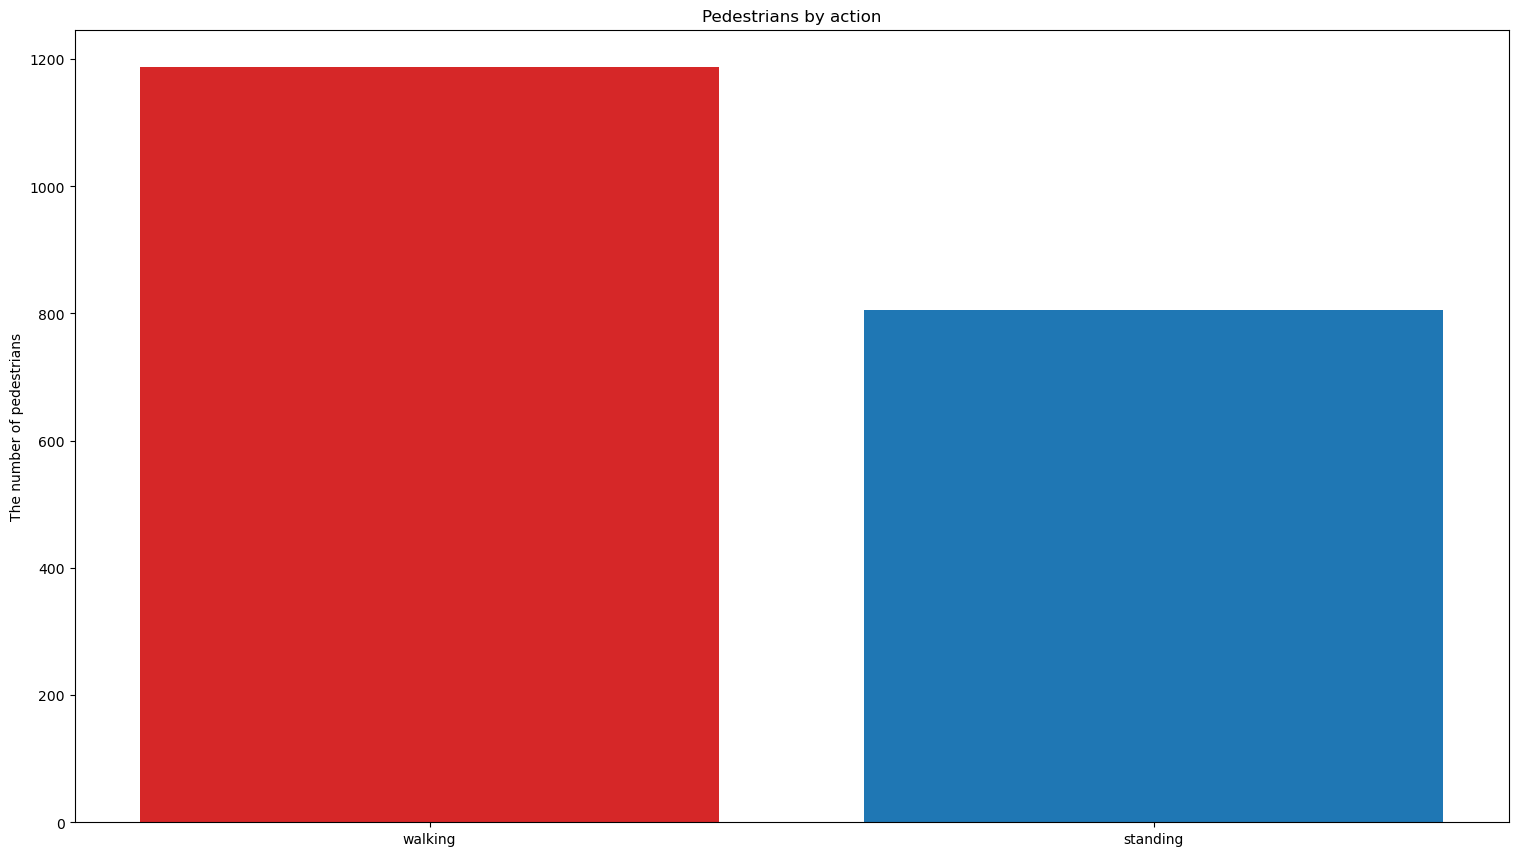

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(100)

fruits = ['walking', 'standing']
counts = [accuracy_csv.values[0][0], accuracy_csv.values[1][0]]
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('The number of pedestrians')
ax.set_title('Pedestrians by action')

plt.show()

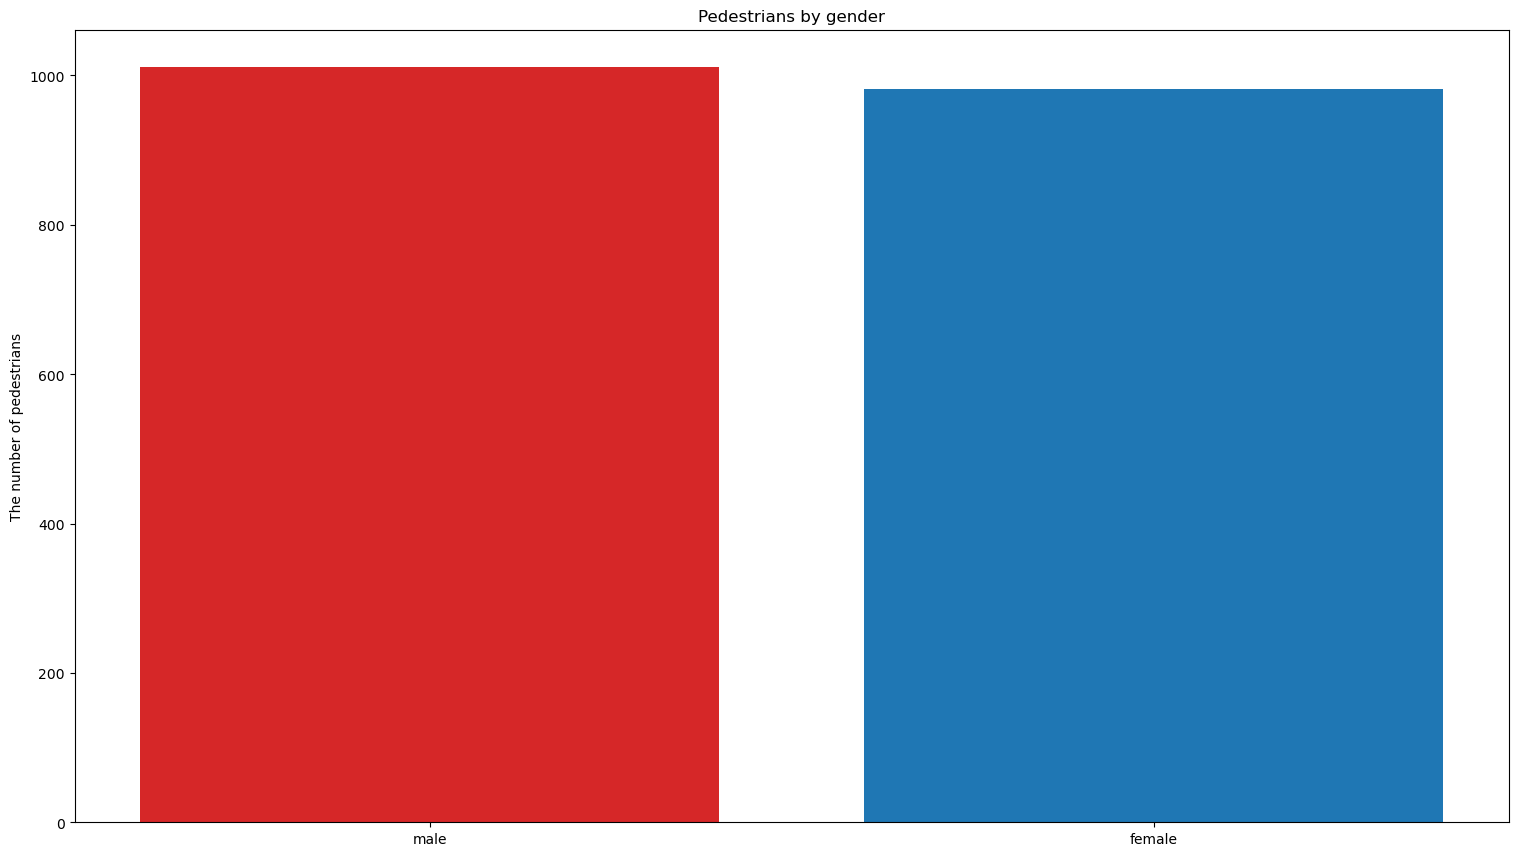

In [15]:
accuracy_csv = pd.DataFrame(df_train.gender.value_counts())
accuracy_csv.values

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(100)

fruits = ['male', 'female']
counts = [accuracy_csv.values[0][0], accuracy_csv.values[1][0]]
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('The number of pedestrians')
ax.set_title('Pedestrians by gender')

plt.show()

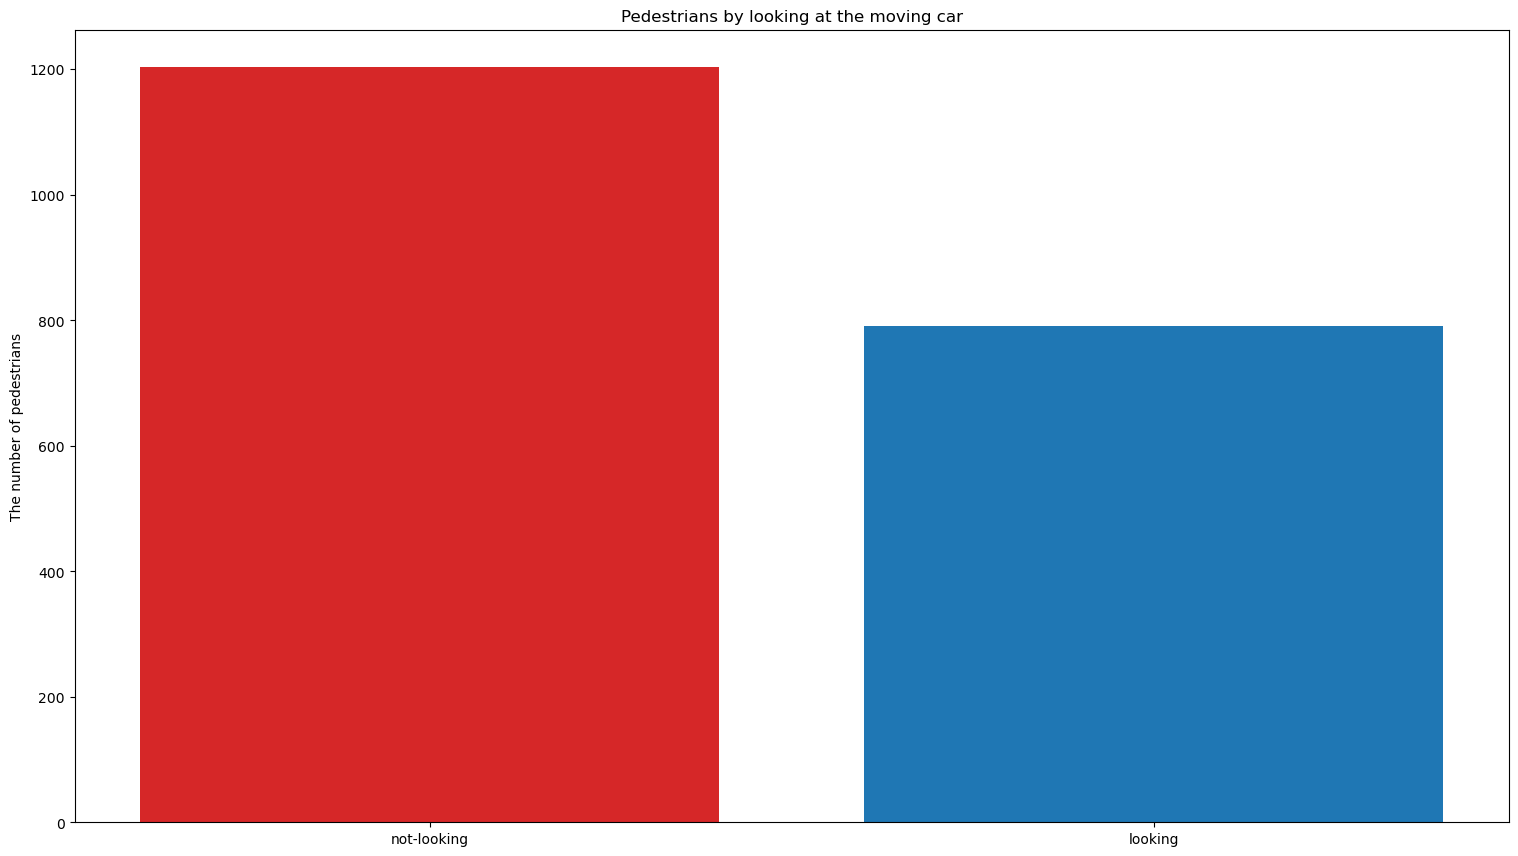

In [16]:
accuracy_csv = pd.DataFrame(df_train.look.value_counts())
accuracy_csv.values

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(100)

fruits = ['not-looking', 'looking']
counts = [accuracy_csv.values[0][0], accuracy_csv.values[1][0]]
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('The number of pedestrians')
ax.set_title('Pedestrians by looking at the moving car')

plt.show()

In [18]:
df_train.cross.value_counts()

0    1298
1     669
2      26
Name: cross, dtype: int64

In [19]:
accuracy_csv.values[0][0]

1298

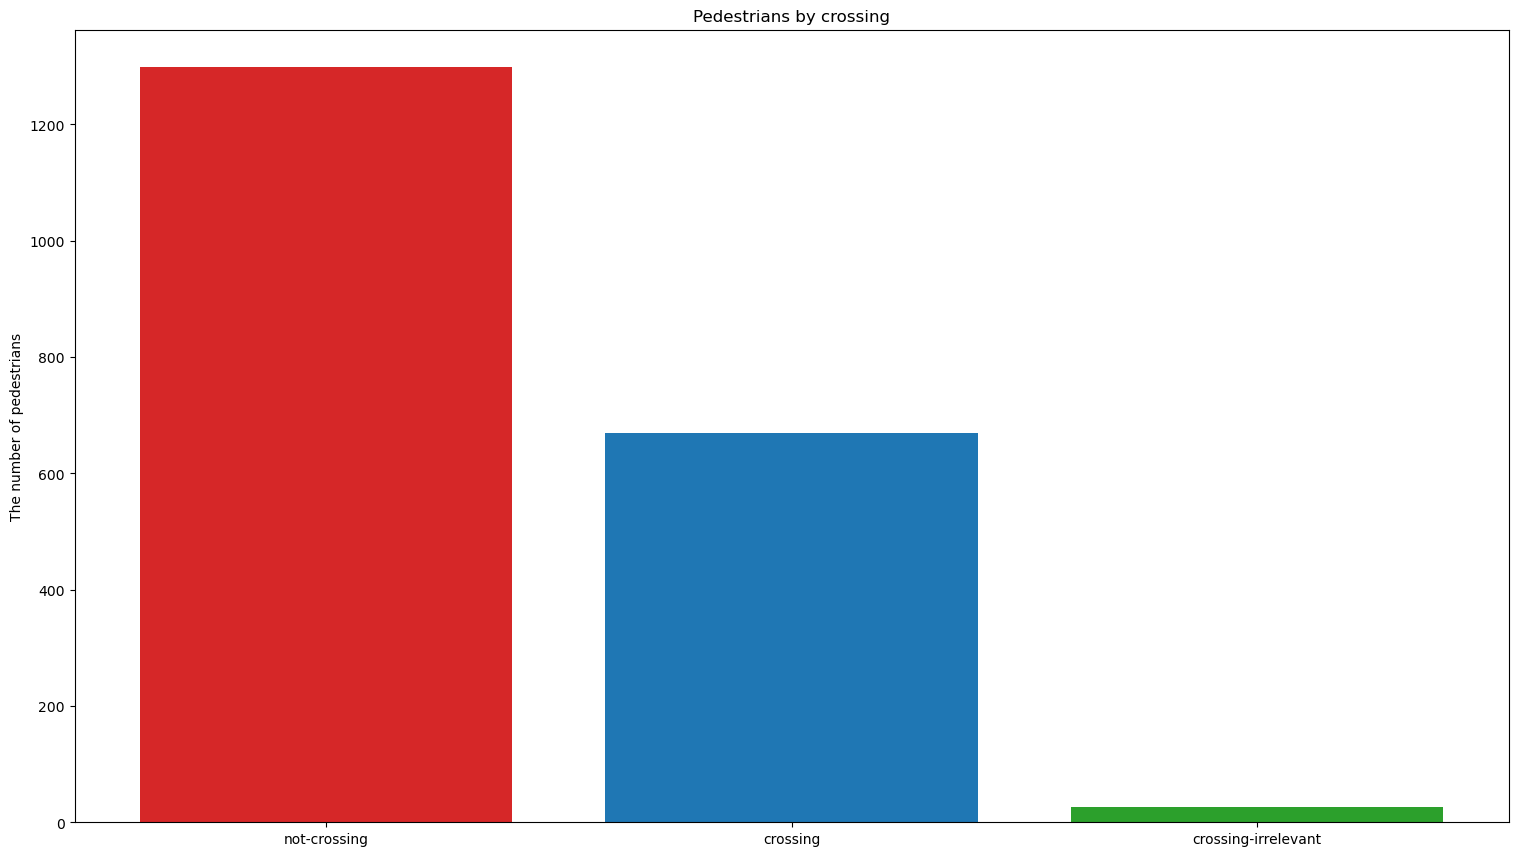

In [20]:
accuracy_csv = pd.DataFrame(df_train.cross.value_counts())
accuracy_csv.values

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(100)

fruits = ['not-crossing', 'crossing', 'crossing-irrelevant']
counts = [accuracy_csv.values[0][0], accuracy_csv.values[1][0], accuracy_csv.values[2][0]]
bar_labels = ['red', 'blue', 'green']
bar_colors = ['tab:red', 'tab:blue', 'tab:green']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('The number of pedestrians')
ax.set_title('Pedestrians by crossing')

plt.show()
